In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import measure
from skimage.color import rgb2grey

r = rgb2grey(mpimg.imread('image.png'))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.1)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for contour in (contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

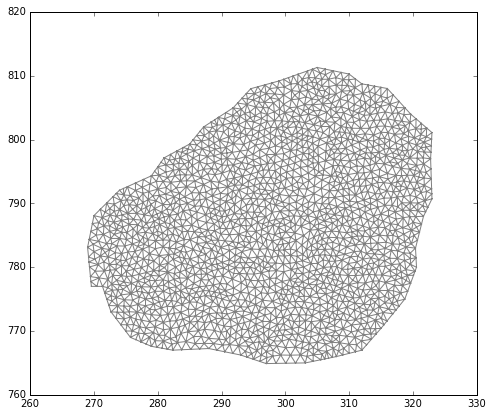

In [2]:
from dolfin import *
from mshr import *

# Select the biggest contour
max_contour = sorted(contours, key=lambda x:len(x), reverse=True)[120]

# Generate the mesh
domain_vertices = [Point(x,y) for x,y in max_contour][::8]

n = 32
geometry = Polygon(domain_vertices)
mesh = generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)



Discrete space size: 1847


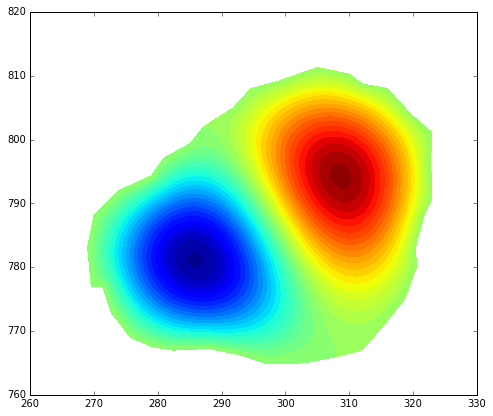

In [3]:

V = FunctionSpace(mesh, 'Lagrange', 1)
bc = DirichletBC(V, 0.0, DomainBoundary())
u, v = TrialFunction(V), TestFunction(V)

a = inner(grad(u), grad(v))*dx
L = Constant(0.0)*v*dx
m = u*v*dx

A, _ = assemble_system(a, L, bc)
B = assemble(m)

print "Discrete space size: %d"%V.dim()
eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
#prm = eigensolver.parameters
#info(prm, True)
eigensolver.parameters['spectrum'] = 'smallest magnitude'

eigensolver.solve(200)
eig = Function(V)
eig_vec = eig.vector()

for j in range(1,2):
    r, c, rx, cx = eigensolver.get_eigenpair(j)
    eig_vec[:] = rx


    plt.figure(figsize=(8,8))
    plot(eig)

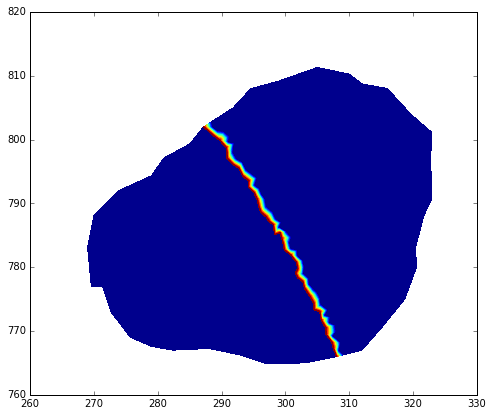

In [4]:
# The easist way to separate the image is to realize that the left side is negative and the right positive

eig_vec[:] = rx
for j in range(len(eig.vector())):
    v = eig.vector()[j]
    if v>0:
        eig.vector()[j] = 1
    else:
        eig.vector()[j] = 0

plt.figure(figsize=(8,8))
plot(eig)

eig_vec[:] = rx
for j in range(len(eig.vector())):
    v = eig.vector()[j]
    if v<0:
        eig.vector()[j] = 1
    else:
        eig.vector()[j] = 0


plot(eig)
plt.savefig('Division1.png')

Discrete space size: 1541
Discrete space size: 1629


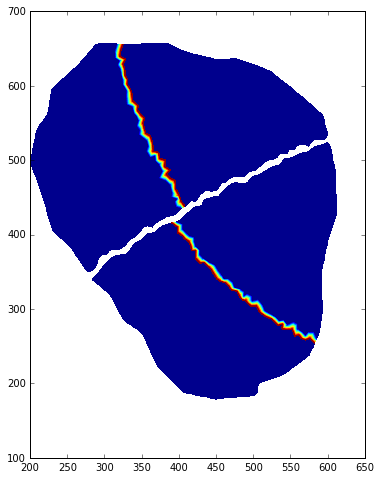

In [5]:
r = rgb2grey(mpimg.imread('Division1.png'))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.1)
plt.figure(figsize=(8,8))
for i in range(2, 4):
    max_contour = sorted(contours, key=lambda x:len(x), reverse=True)[i]

    
    domain_vertices = [Point(x,y) for x,y in max_contour][::8]

    n = 32
    geometry = Polygon(domain_vertices)
    mesh = generate_mesh(geometry,n)
    
    V = FunctionSpace(mesh, 'Lagrange', 1)
    bc = DirichletBC(V, 0.0, DomainBoundary())
    u, v = TrialFunction(V), TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = Constant(0.0)*v*dx
    m = u*v*dx

    A, _ = assemble_system(a, L, bc)
    B = assemble(m)

    print "Discrete space size: %d"%V.dim()
    eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
    #prm = eigensolver.parameters
    #info(prm, True)
    eigensolver.parameters['spectrum'] = 'smallest magnitude'

    eigensolver.solve(200)
    eig = Function(V)
    eig_vec = eig.vector()

    
    r, c, rx, cx = eigensolver.get_eigenpair(1)
    eig_vec[:] = rx

    eig_vec[:] = rx
    for j in range(len(eig.vector())):
        v = eig.vector()[j]
        if v>0:
            eig.vector()[j] = 1
        else:
            eig.vector()[j] = 0

    plot(eig)

    eig_vec[:] = rx
    for j in range(len(eig.vector())):
        v = eig.vector()[j]
        if v<0:
            eig.vector()[j] = 1
        else:
            eig.vector()[j] = 0


    plot(eig)